## 01. Import Libraries

In [2]:
#import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import plotly.express as px
from fractions import Fraction # Library to calculate fractions
import matplotlib
import folium
import json
import plotly
import plotly.express as px

## 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Path & Data Set 

In [3]:
# Project folder shortcut path 
path = r'C:\Users\Gregor\ownCloud\CareerFoundry\6.1\WorldUniversityRankings'

In [4]:
path

'C:\\Users\\Gregor\\ownCloud\\CareerFoundry\\6.1\\WorldUniversityRankings'

In [5]:
# import World University Rankings cleaned data set
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'timesData_cleaned.csv'), index_col = 0)

In [6]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2.0,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,28 : 72,2016


## 3. Clean your data so that it’s ready for analysis.

In [6]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [7]:
#change the datatype of the female_male_ratio column to float
df['female_male_ratio'] = [str(i).replace(" ", "") for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("nan", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("-", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace(":", "/")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [Fraction(str(i).replace("100/0", "100")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [float(Fraction(str(i).replace("", ""))) for i in df['female_male_ratio']]
df['female_male_ratio']

0       0.000000
1       0.492537
2       0.587302
3       0.724138
4       0.818182
          ...   
2598    0.923077
2599    0.562500
2600    0.000000
2601    0.388889
2602    0.754386
Name: female_male_ratio, Length: 2603, dtype: float64

In [8]:
# Create subset including only data from 2016
df_2016 = df.loc[df['year'] == 2016]
pd.set_option('display.max_rows', 200)
df_2016.shape

(800, 14)

In [9]:
# Create subset including only data from top 200 Universities
df_sub_top200_2016 = df_2016[df_2016['world_rank'].str.len()<5]
df_sub_top200_2016.shape

(200, 14)

In [10]:
pd.set_option('display.max_rows', 10)
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,=196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,=196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [11]:
# Delete any '=' in the data set
df_sub_top200_2016['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200_2016['world_rank']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_16936\272667305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200_2016['world_rank']]


In [12]:
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [13]:
# Replace any '-' in the data set with '0'
df_sub_top200_2016['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['world_rank']]
df_sub_top200_2016['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['teaching']]
df_sub_top200_2016['international'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['international']]
df_sub_top200_2016['research'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['research']]
df_sub_top200_2016['citations'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['citations']]
df_sub_top200_2016['income'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['income']]
df_sub_top200_2016['total_score'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['total_score']]
df_sub_top200_2016['num_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['num_students']]
df_sub_top200_2016['student_staff_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['student_staff_ratio']]
df_sub_top200_2016['international_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['international_students']]
df_sub_top200_2016['female_male_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['female_male_ratio']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_16936\139661194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['world_rank']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_16936\139661194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['teaching']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_16936\139661194.py:4: S

In [14]:
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196.0,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196.0,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198.0,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199.0,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


## 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


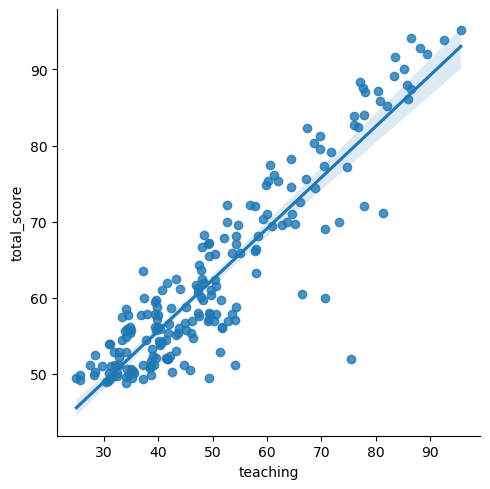

In [15]:
# Create scatterplot for the "teaching" and "total_score" columns
sns.lmplot(x = 'teaching', y = 'total_score', data = df_sub_top200_2016)

## 5. State your hypothesis in a markdown cell within your Jupyter notebook.


When the teaching score of a University increases, then the total score also increases.

## 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.


In [16]:
# Reshaped the variables into NumPy arrays and put them into separate objects.

X = df_sub_top200_2016['teaching'].values.reshape(-1,1)
y = df_sub_top200_2016['total_score'].values.reshape(-1,1)

In [17]:
X

array([[95.6],
       [86.5],
       [92.5],
       [88.2],
       [89.4],
       [83.6],
       [85.1],
       [83.3],
       [77. ],
       [85.7],
       [77.6],
       [86.5],
       [80.4],
       [78.1],
       [85.9],
       [80.8],
       [82. ],
       [77.9],
       [75.9],
       [76. ],
       [76.8],
       [67.4],
       [69.8],
       [68.6],
       [69.8],
       [71.7],
       [64.5],
       [60.6],
       [70.5],
       [74.7],
       [61.3],
       [67.1],
       [62. ],
       [60.2],
       [59.9],
       [64.5],
       [68.8],
       [66.1],
       [56.9],
       [52.6],
       [57.8],
       [77.8],
       [81.4],
       [60.1],
       [64.6],
       [59.3],
       [73.3],
       [52.6],
       [63.7],
       [65.1],
       [62.8],
       [54.7],
       [61. ],
       [70.6],
       [48.4],
       [58.4],
       [54.3],
       [52.2],
       [49.4],
       [49.2],
       [54.3],
       [48.1],
       [58. ],
       [57.8],
       [55. ],
       [53.5],
       [50

In [18]:
y

array([[95.2],
       [94.2],
       [93.9],
       [92.8],
       [92. ],
       [91.6],
       [90.1],
       [89.1],
       [88.3],
       [87.9],
       [87.6],
       [87.4],
       [87.2],
       [87.1],
       [86.1],
       [85.8],
       [85.2],
       [84. ],
       [83.9],
       [82.7],
       [82.4],
       [82.3],
       [81.3],
       [80.3],
       [79.5],
       [79.2],
       [78.2],
       [77.5],
       [77.3],
       [77.2],
       [76.1],
       [75.6],
       [75.4],
       [75.3],
       [74.8],
       [74.5],
       [74.4],
       [72.6],
       [72.2],
       [72.2],
       [72.1],
       [72. ],
       [71.1],
       [71. ],
       [71. ],
       [70.3],
       [70. ],
       [70. ],
       [69.9],
       [69.7],
       [69.6],
       [69.5],
       [69.4],
       [69. ],
       [68.2],
       [68.1],
       [68.1],
       [67.8],
       [67.2],
       [67. ],
       [67. ],
       [66.6],
       [66.4],
       [66.1],
       [65.9],
       [65.9],
       [65

## 7. Split the data into two sets: a training set and a test set.

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Run a linear regression on the data. 

In [20]:
# Create a regression object.

regression = LinearRegression() 

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

## 9. Create a plot that shows the regression line on the test set.

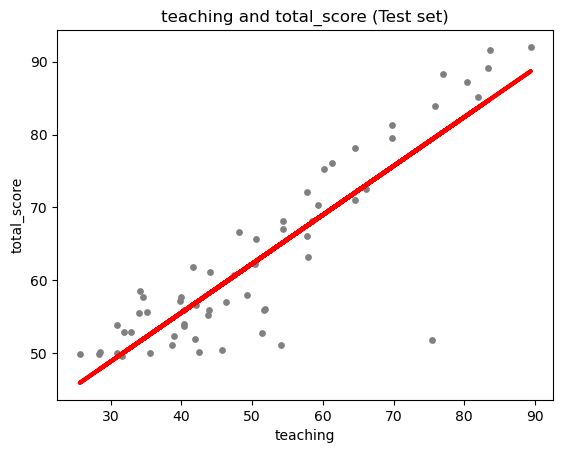

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('teaching and total_score (Test set)')
plot_test.xlabel('teaching')
plot_test.ylabel('total_score')
plot_test.show()

## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The regression line has a positive correlation/slope meaning that the higher the teaching score of a University is the higher the total_score becomes. However, there is one outlier which is far away from the regression line.

## 11. Check the model performance statistics—MSE and R2 score.

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66924849]]
Mean squared error:  34.004137435806385
R2 score:  0.777419738498009


## 12. Compare the predicted y values with the actual y values in a dataframe.

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data

,Actual,Predicted
0,83.9,79.627908
1,51.1,54.731865
2,57.7,51.921021
3,58.0,61.825899
4,50.5,59.483529
...,...,...
55,79.5,75.545493
56,76.1,69.856881
57,51.9,79.293284
58,72.1,67.514511


## 13. Include your thoughts on how well the model performed on the test set in a markdown cell. 

This regression model did perform well on the test set. When I compare the actual data with the predicted one it is not far off and it generally follows the trend that the higher the teaching score is the larger the total_score becomes. I think another good indicator is the R2 score. Since it is 0.78, which is close to one, it indicates a good fit. The MSE, however, is relatively large with a value of 34 indicating that there are many data points further away from the regression line.

As discussed in the previous exercises, data bias could occur due to undermining non-English-instructing institutions and thus creating lower teaching as well as total score ratings for non-English-instructing Universities.